In [537]:
import cobra
from cobra.io import read_sbml_model
from cobra import Reaction, Metabolite, Model
import cameo
from cameo import phenotypic_phase_plane
from cameo import models
#from cameo.visualization.plotting.with_plotly import PlotlyPlotter
#plotter = PlotlyPlotter()
from cameo import load_model
from cameo import phenotypic_phase_plane
from cameo.strain_design import OptGene
from cameo import models
#from cameo.visualization.plotting.with_plotly import PlotlyPlotter
from cameo.visualization.plotting.with_plotly import PlotlyPlotter
plotter = PlotlyPlotter()

In [538]:
#model = models.bigg.iJO1366
model = read_sbml_model('iML1515.xml')

# Essential Genes

In [525]:
model = read_sbml_model('iML1515.xml')

In [452]:
essentiality = {}
for gene in model.genes:
    with model:
        model.genes.get_by_id(gene.id).knock_out()
        essentiality[gene] = model.slim_optimize(error_value=0.)

<AxesSubplot:ylabel='Frequency'>

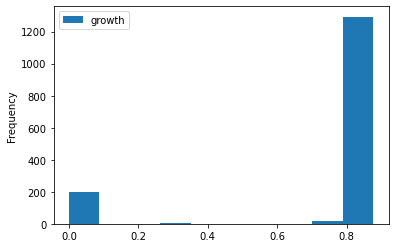

In [453]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame.from_dict(essentiality, orient='index')
df = df.rename(columns={0: 'growth'})
df = df.sort_values('growth')
df = df.reset_index(level=0)
df.rename(columns = {'index':'gene'}, inplace = True)
df_essential=df[df.growth<0.1]
df_inessential=df[df.growth>0.1]
df.plot.hist()

In [454]:
essential_genes=[]
for i in df_essential.gene:
    essential_genes.append(i.id)
    
inessential_genes=[]
for i in df_inessential.gene:
    inessential_genes.append(i.id)

# Loading model/Addition of medium/gene deletion in model

In [518]:
#model = read_sbml_model('iML1515.xml')
#model = read_sbml_model('iJO1366.xml')
model = models.bigg.iML1515

In [487]:
#Addition of medium, reactions, gene deletion
# media
medium = model.medium
medium['EX_glc__D_e'] = 30
medium['EX_rib__D_e'] = 10
model.medium = medium
#model.reactions.BIOMASS_Ec_iJO1366_core_53p95M.lower_bound = 0.45

model.genes.get_by_id("b0677").knock_out()
model.genes.get_by_id("b0678").knock_out()
model.genes.get_by_id("b0679").knock_out()
model.genes.get_by_id("b1817").knock_out()
model.genes.get_by_id("b1818").knock_out()
model.genes.get_by_id("b1819").knock_out()
model.genes.get_by_id("b1101").knock_out()
model.genes.get_by_id("b2415").knock_out()
model.genes.get_by_id("b2416").knock_out()
model.genes.get_by_id("b2417").knock_out()

# from iJO1366.xml
#model.genes.get_by_id("b2926").knock_out()
#model.genes.get_by_id("b0723").knock_out()
#model.genes.get_by_id("b1702").knock_out()

reaction = Reaction("ExRe1")
reaction.name = "GlcNAc-6-P N-Acetyltransferase"
reaction.lower_bound = 0
reaction.upper_bound = 1000

reaction.add_metabolites({ 
model.metabolites.get_by_id("ac_c"): -1.0,
model.metabolites.get_by_id("gam6p_c"): -1.0,
model.metabolites.get_by_id("acgam6p_c"): 1.0,
model.metabolites.get_by_id("h2o_c"): 1.0
})
model.add_reactions([reaction])
reaction = Reaction("ExRe2")
reaction.name = "GlcNAc-6-P phosphatase"
reaction.lower_bound = 0
reaction.upper_bound = 1000

reaction.add_metabolites({
    model.metabolites.get_by_id("acgam6p_c"): -1.0,
    model.metabolites.get_by_id("pyr_c"): -1.0,
    model.metabolites.get_by_id("pep_c"): 1.0,
    model.metabolites.get_by_id("acgam_p"): 1.0
})
model.add_reactions([reaction])

In [536]:
#Plotting the phnotype phase plane
ppp = phenotypic_phase_plane(model,
                             variables=[model.reactions.BIOMASS_Ec_iML1515_core_75p37M],
                             objective=model.reactions.ExRe2)

ppp.plot(plotter)

AttributeError: 'float' object has no attribute 'id'

# Optgene (for a different E.coli strain)

In [118]:
optgene = OptGene(model)

In [129]:
optgene = OptGene(model,essential_genes=essential_genes,essential_reactions=[model.reactions.ExRe1,model.reactions.ExRe2],manipulation_type='genes')

In [96]:
#result = optgene.run(target=model.reactions.ExRe2, 
#                     biomass=model.reactions.BIOMASS_Ec_iML1515_core_75p37M,
#                     substrate=model.metabolites.glc__D_e,
#                     max_evaluations=500, population_size=20, max_knockouts=15,
#                     plot=False, growth_coupled=True)

In [131]:
result = optgene.run(target=[model.reactions.ExRe2], 
                     biomass=model.reactions.BIOMASS_Ec_iJO1366_core_53p95M,
                     substrate=model.metabolites.glc__D_e,
                     max_knockouts=1000,
                     max_evaluations=5000, plot=False, growth_coupled=True)

Starting optimization at Wed, 30 Nov 2022 10:09:53


HBox()

Finished after 00:08:15


In [165]:
result

,reactions,genes,size,fva_min,fva_max,target_flux,biomass_flux,yield,fitness
0,"(PGK, PPS, SUCDi)","((b1702, b0723, b2926),)",3,10.708284,1000.0,10.816448,1.983991,0.360548,0.715325


In [464]:
result.display_on_map(result_org, "e_coli_core.Core metabolism")

Builder(reaction_data={'EX_co2_e': 62.028795, 'EX_cobalt2_e': -5e-05, 'DM_4crsol_c': 0.000442, 'DM_5drib_c': 0…

# Our Model

In [527]:
#model = read_sbml_model('iML1515.xml')
#model = read_sbml_model('iJO1366.xml')
#model = models.bigg.iML1515

In [539]:
#gene integration
# media
medium = model.medium
medium['EX_glc__D_e'] = 30
medium['EX_rib__D_e'] = 10
model.medium = medium
model.reactions.BIOMASS_Ec_iML1515_core_75p37M = 0.45

# model.genes.get_by_id("b0677").knock_out()
# model.genes.get_by_id("b0678").knock_out()
# model.genes.get_by_id("b0679").knock_out()
# model.genes.get_by_id("b1817").knock_out()
# model.genes.get_by_id("b1818").knock_out()
# model.genes.get_by_id("b1819").knock_out()
# model.genes.get_by_id("b1101").knock_out()
# model.genes.get_by_id("b2415").knock_out()
# model.genes.get_by_id("b2416").knock_out()
# model.genes.get_by_id("b2417").knock_out()

# # #from iJO1366.xml
# model.genes.get_by_id("b2926").knock_out()
# model.genes.get_by_id("b0723").knock_out()
# model.genes.get_by_id("b1702").knock_out()

# model.genes.get_by_id("b0010").knock_out()

reaction = Reaction("ExRe1")
reaction.name = "GlcNAc-6-P N-Acetyltransferase"
reaction.lower_bound = 0
reaction.upper_bound = 1000

reaction.add_metabolites({
model.metabolites.get_by_id("accoa_c"): -1.0,
model.metabolites.get_by_id("gam6p_c"): -1.0,
model.metabolites.get_by_id("acgam6p_c"): 1.0,
model.metabolites.get_by_id("coa_c"): 1.0,
model.metabolites.get_by_id("h_c"): 1.0
    
#     model.metabolites.get_by_id("ac_c"): -1.0,
#     model.metabolites.get_by_id("gam6p_c"): -1.0,
#     model.metabolites.get_by_id("acgam6p_c"): 1.0,
#     model.metabolites.get_by_id("h2o_c"): 1.0
})
model.add_reactions([reaction])


reaction = Reaction("ExRe2")
reaction.name = "GlcNAc-6-P phosphatase"
reaction.lower_bound = 0
reaction.upper_bound = 1000

reaction.add_metabolites({
    model.metabolites.get_by_id("acgam6p_c"): -1.0,
    model.metabolites.get_by_id("adp_c"): -1.0,
    model.metabolites.get_by_id("atp_c"): 1.0,
    model.metabolites.get_by_id("acgam_p"): 1.0
})
model.add_reactions([reaction])

#model.objective=model.reactions.EX_acgam_e
model.optimize()

,fluxes,reduced_costs
CYTDK2,0.000000,-7.523353e-03
XPPT,0.000000,-1.504671e-02
HXPRT,0.000000,-1.504671e-02
NDPK5,0.000000,-0.000000e+00
SHK3Dr,1.294783,0.000000e+00
...,...,...
BMOGDS2,0.000000,-3.338488e-01
FESD2s,0.000000,2.168404e-17
OCTNLL,0.000000,-1.504671e-02
ExRe1,0.000000,5.551115e-17


In [543]:
optgene = OptGene(model)

In [545]:
result_org = optgene.run(target=[model.reactions.EX_acgam_e], 
                     biomass=model.reactions.BIOMASS_Ec_iML1515_core_75p37M,
                     max_evaluations=5000, plot=False)

TypeError: item in iterable cannot be '<class 'float'>'

In [496]:
result_org

No solutions found


,reactions,size,fva_min,fva_max,target_flux,biomass_flux,yield,fitness
